In [26]:
import tensorflow
from keras.layers import Dense, Normalization
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
training_data = pd.read_csv("TrainingData.csv")
training_data = training_data.drop(columns=['Date','Rented Bike Count'])
training_label = pd.read_csv("UnscaledTrainigData.csv")

normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(training_data))


In [ ]:
model = Sequential([
    normalizer,
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (7008, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (128.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 31 (128.00 B)

In [29]:
model.fit(training_data, training_label, epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0020 - loss: 685.9418
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 429.3835
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 285.2615
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: 275.8062
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0130 - loss: 258.5451
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0218 - loss: 256.3630
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0222 - loss: 257.2607
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0257 - loss: 253.1652
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0284 - loss: 251.3101
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0297 - loss: 253.1880
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0246 - loss: 248.7503
Epoch 1

In [30]:
test_data = pd.read_csv("TestData.csv")
test_data = test_data.drop(columns=['Date','Rented Bike Count'])
test_label = pd.read_csv("UnscaledTestData.csv")

In [31]:
test_loss, test_accuracy = model.evaluate(test_data, test_label)
print(test_loss)
print(test_accuracy)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0080 - loss: 138.0636   
189.70269775390625
0.028538811951875687


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1752


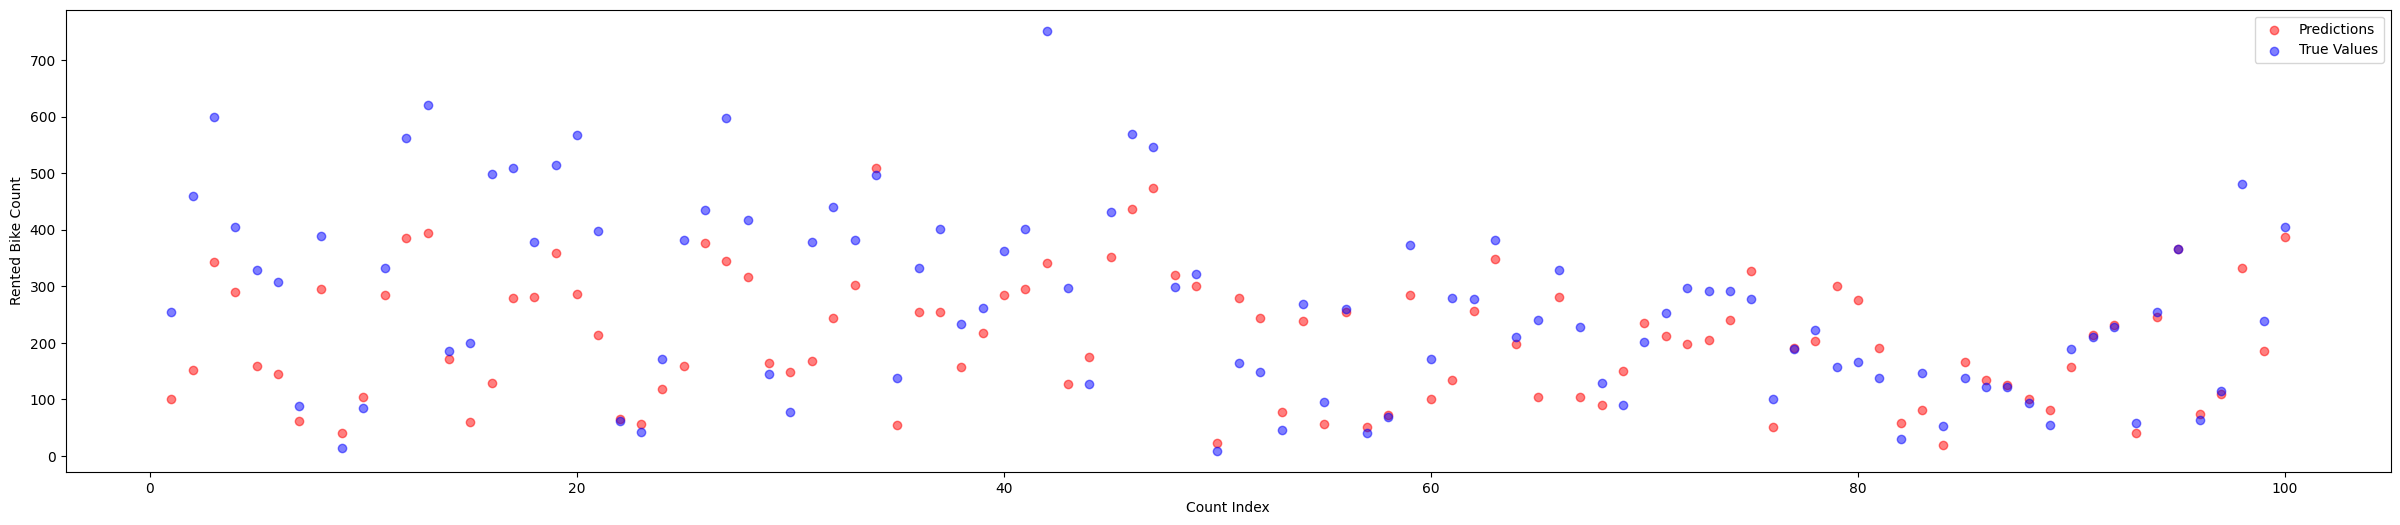

In [ ]:
test_predictions = model.predict(test_data).flatten()

fig, ax = plt.subplots(figsize=(30, 6))
a = ax
ax.scatter(range(1, 101), test_predictions[:100], color='red', alpha=0.5, label='Predictions')
ax.scatter(range(1, 101), test_label.iloc[:100, 0], color='blue', alpha=0.5, label='True Values')
ax.set_xlabel('Count Index')
ax.set_ylabel('Rented Bike Count')
ax.legend()
plt.show()

1752


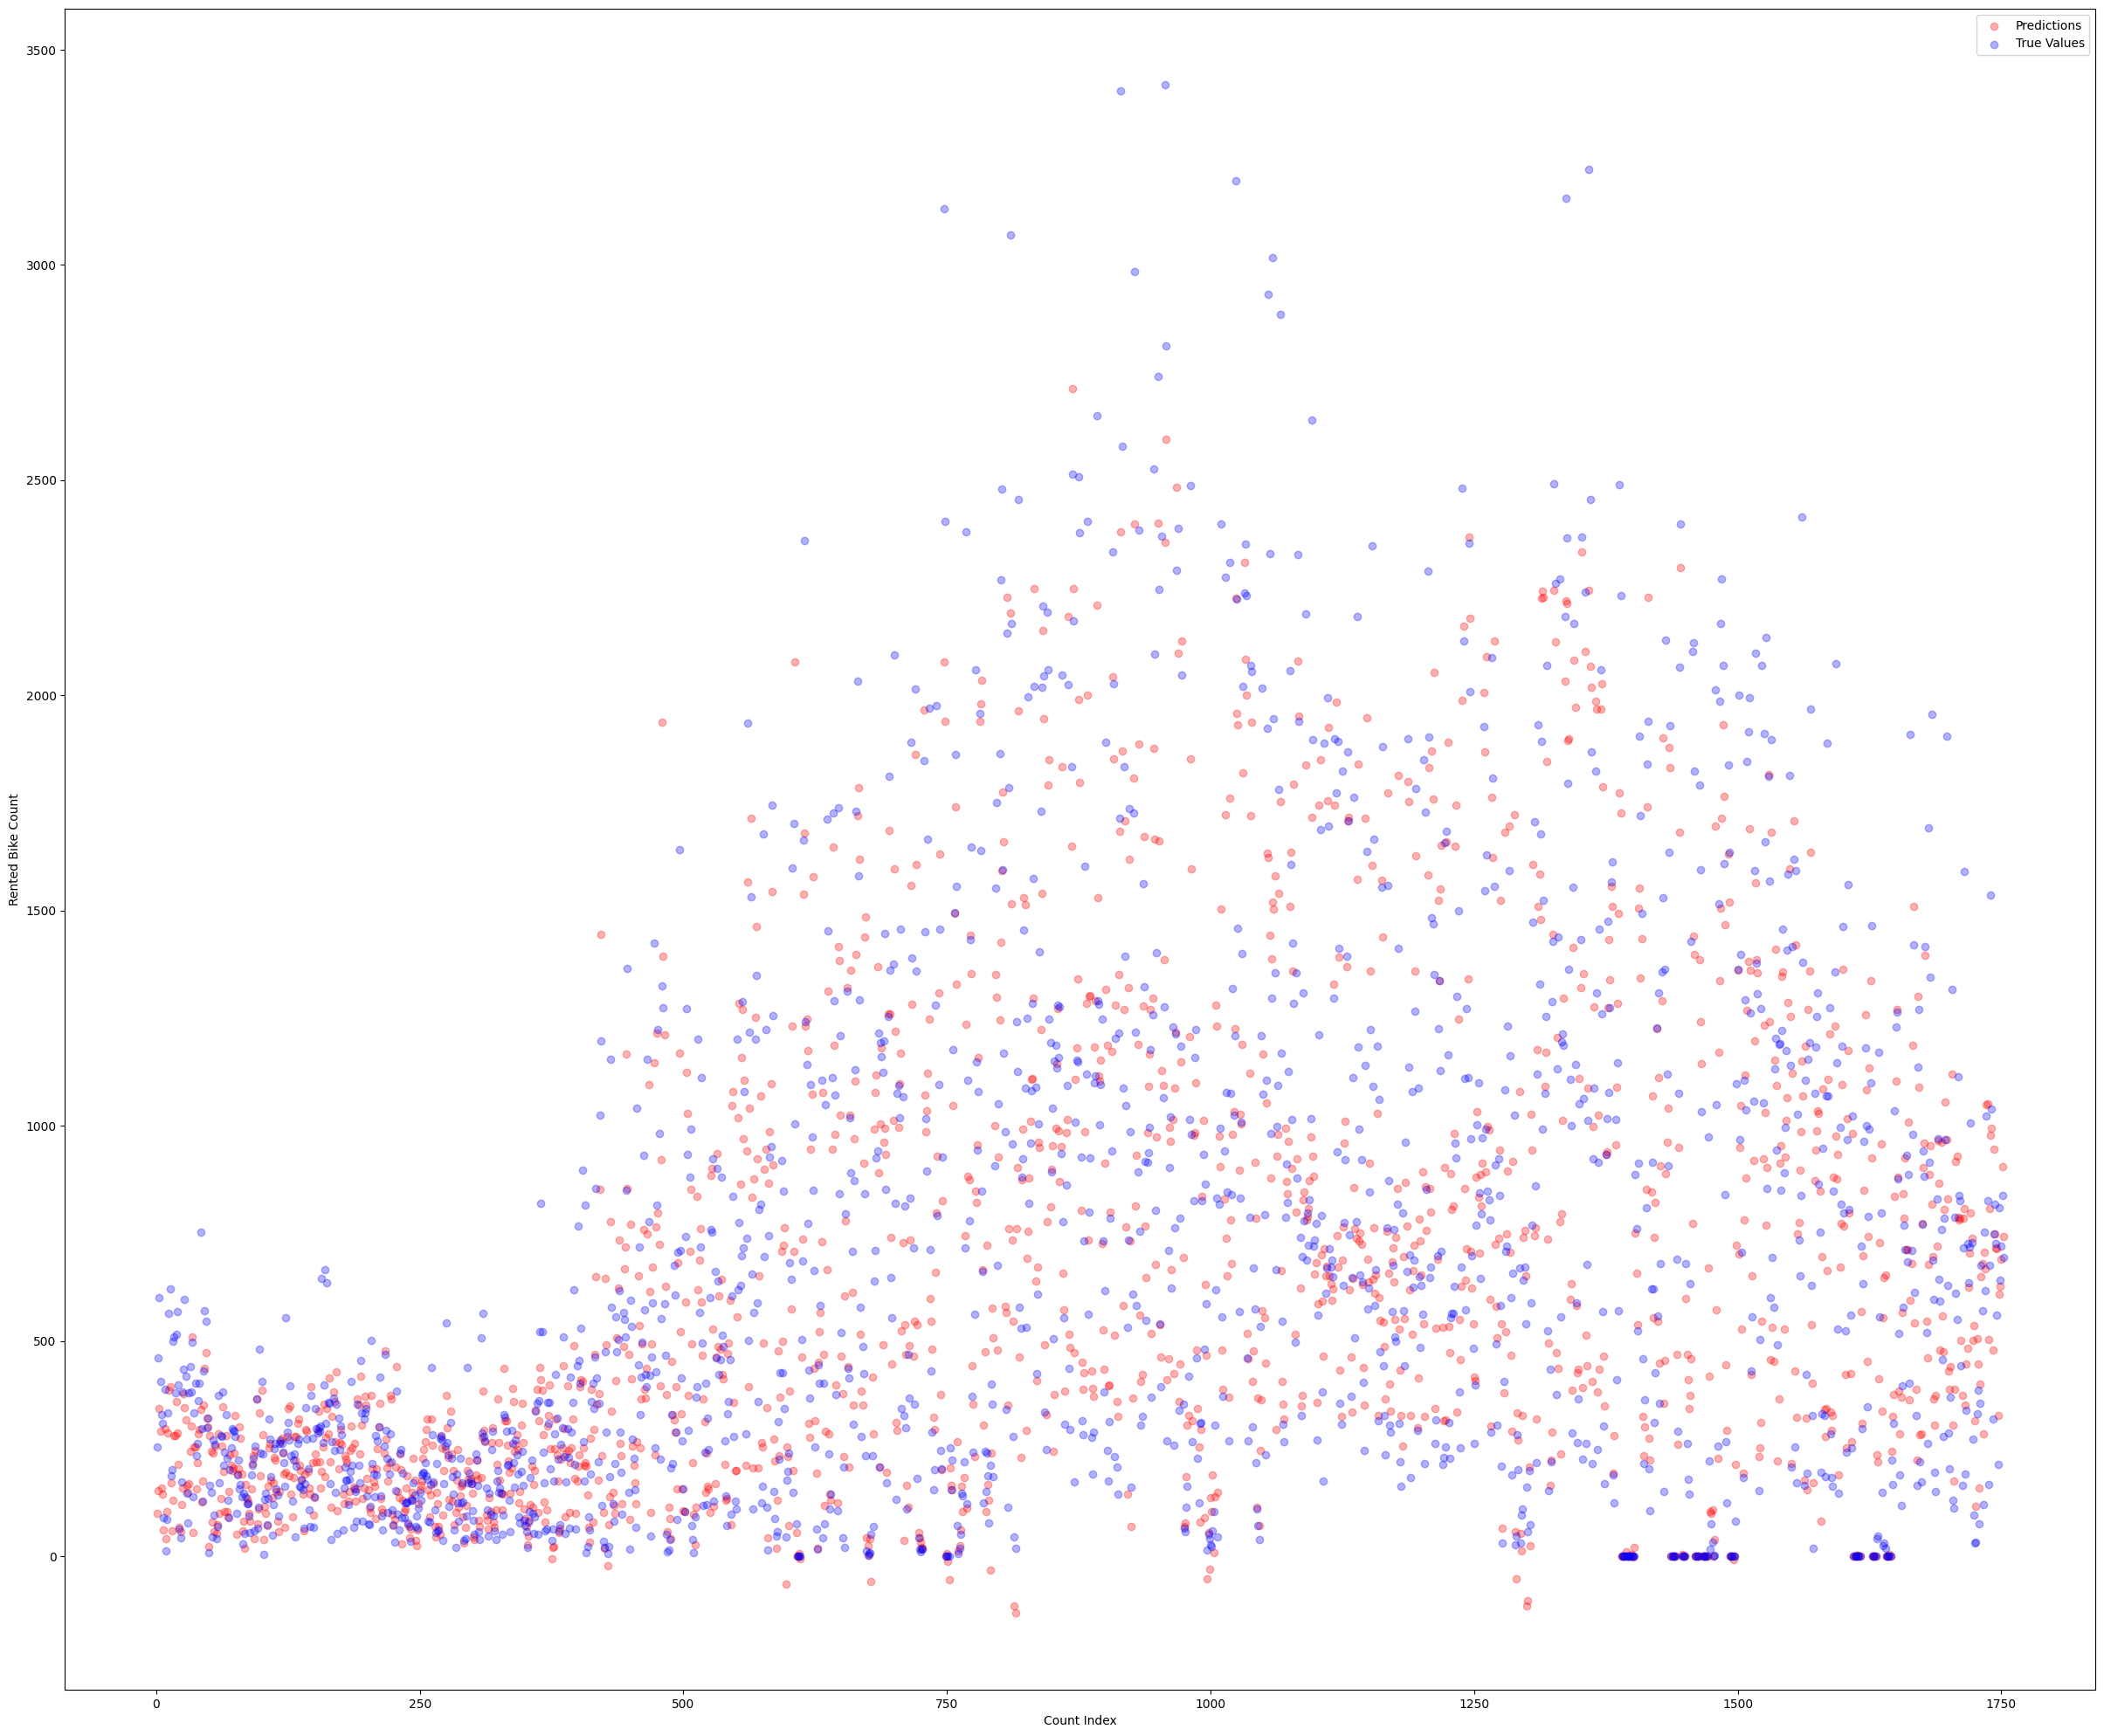

In [71]:
fig, ax = plt.subplots(figsize=(30, 25))
a = ax
ax.scatter(range(1, 1753), test_predictions, color='red', alpha=0.3, label='Predictions')
ax.scatter(range(1, 1753), test_label, color='blue', alpha=0.3, label='True Values')
print(len(test_label))
ax.set_xlabel('Count Index')
ax.set_ylabel('Rented Bike Count')
ax.legend()
plt.show()